In [2]:
#Read files
import pandas as pd
import numpy as np
df_close = pd.read_csv("stock_data.csv")
df_info = pd.read_csv("stock_info.csv")

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess data

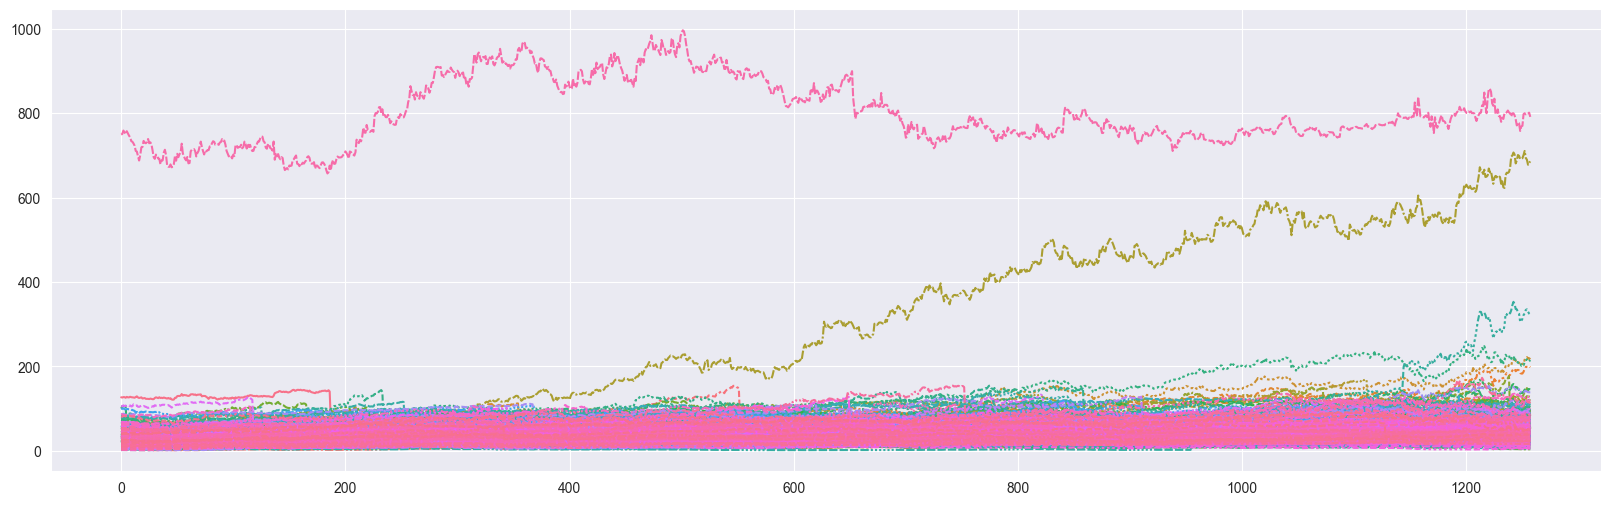

In [20]:
sns.set_style('darkgrid')          # 统一风格
plt.rcParams['figure.figsize'] = (20, 6)
fig = sns.lineplot(data=df_close,legend=False)
#size of the plot

plt.show()


In [5]:
log_ret = np.log(df_close).diff().dropna(how='all')

In [21]:
logret_z = (log_ret - log_ret.mean()) / log_ret.std()
logret_z.to_csv('logret_z.csv') 

In [176]:
df_close

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WEC,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
0,126.75,30.51,40.05,21.75,25.60,7.01,3.24,42.04,31.59,19.14,...,25.65,13.50,11.35,8.16,22.03,80.23,17.60,25.12,40.30,40.64
1,126.27,30.69,40.44,21.34,26.30,6.94,3.45,42.33,31.60,19.05,...,25.59,13.40,11.54,8.28,22.94,80.70,18.10,24.55,40.40,40.27
2,127.19,31.97,40.70,22.11,27.51,7.16,3.45,42.75,32.00,19.96,...,26.48,13.29,12.25,8.44,24.24,82.97,18.94,24.99,40.66,41.39
3,127.07,31.78,38.87,22.07,28.51,7.17,3.37,42.18,31.73,19.78,...,26.05,13.31,11.80,8.31,25.45,82.51,19.15,25.15,40.26,41.59
4,125.70,31.17,39.85,22.40,27.13,6.69,3.35,42.23,31.80,18.82,...,26.11,13.02,12.60,8.27,24.71,81.47,18.75,25.27,40.00,42.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,86.26,63.15,58.35,83.85,42.84,7.77,22.09,58.40,62.52,36.98,...,49.67,113.28,22.99,16.38,22.44,52.58,24.05,38.66,67.42,48.83
1254,86.07,62.86,57.88,82.54,43.12,7.77,22.13,58.82,62.77,37.47,...,49.13,117.67,22.89,16.49,22.50,51.50,23.96,38.71,67.13,48.10
1255,85.40,61.32,56.98,80.50,42.34,7.53,21.71,57.78,62.14,37.14,...,49.06,114.59,22.64,16.19,21.98,51.54,23.71,37.96,66.41,46.32
1256,85.09,61.90,57.23,79.98,42.93,7.32,21.66,57.87,62.49,37.49,...,49.05,115.71,22.72,16.34,21.92,50.02,23.45,38.54,66.45,46.14


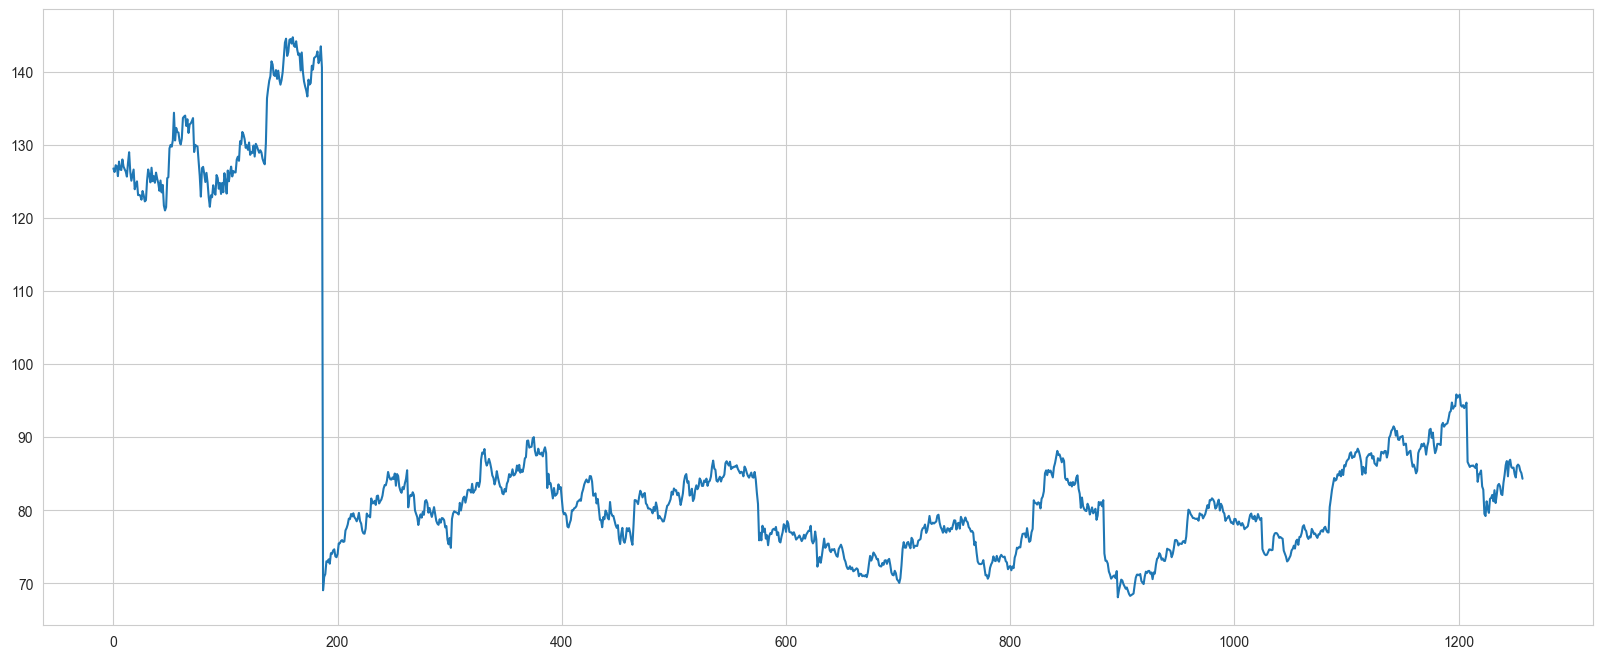

In [106]:
plt.figure(figsize=(20, 8))
df_close.MMM.plot()
plt.show()

# Log return distribution


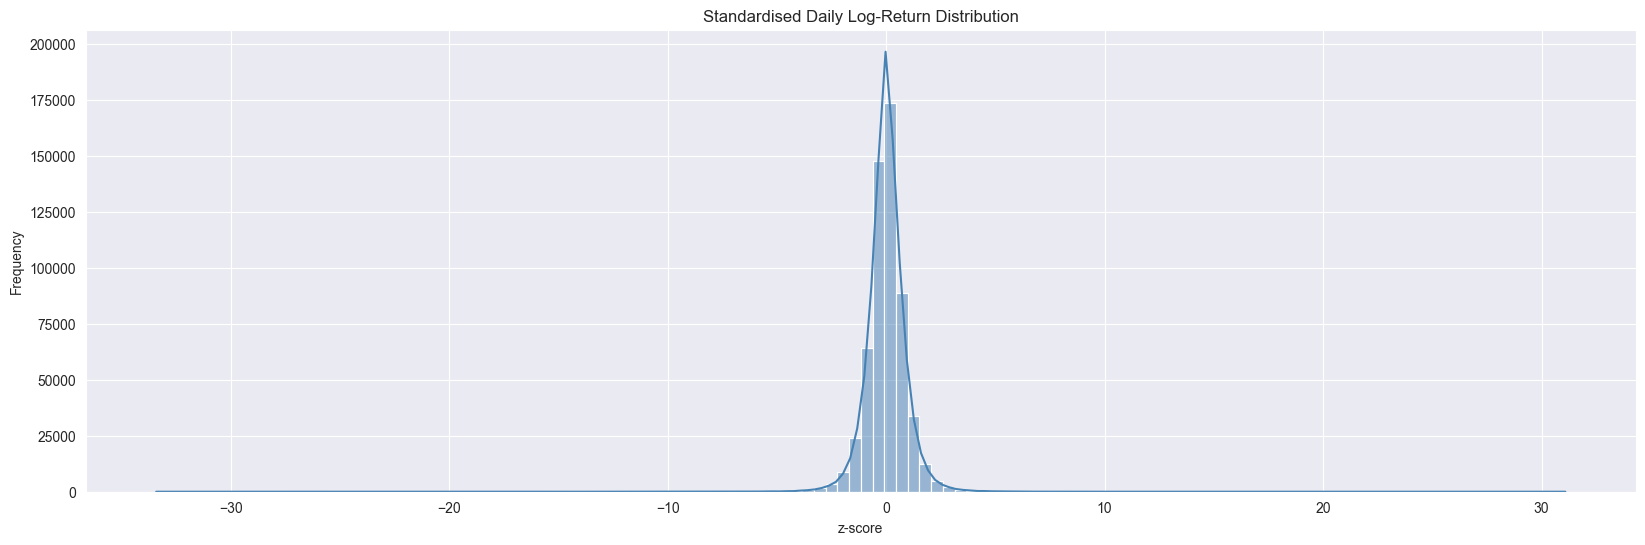

In [22]:
sns.histplot(logret_z.values.flatten(), bins=120, kde=True, color='steelblue')
plt.title('Standardised Daily Log-Return Distribution')
plt.xlabel('z-score'); plt.ylabel('Frequency')
plt.show()

# Randomly select 50 days and 25 stocks

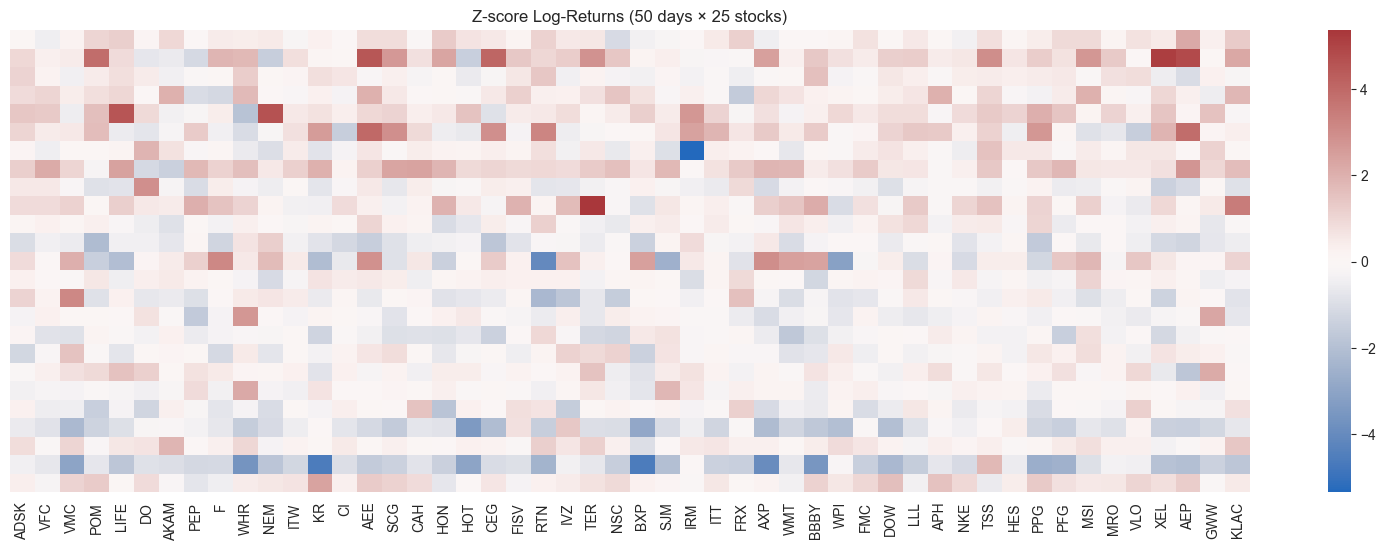

In [34]:
SAMPLE_STOCK_NUM = 50
SAMPLE_DAY_NUM = 25
sample_days  = np.random.choice(logret_z.index, SAMPLE_DAY_NUM, replace=False)
sample_stk   = np.random.choice(logret_z.columns, SAMPLE_STOCK_NUM, replace=False)
sns.heatmap(logret_z.loc[sample_days, sample_stk],
            cmap='vlag', center=0, xticklabels=True, yticklabels=False)
plt.title('Z-score Log-Returns (50 days × 25 stocks)')
plt.show()

/Users/rick/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


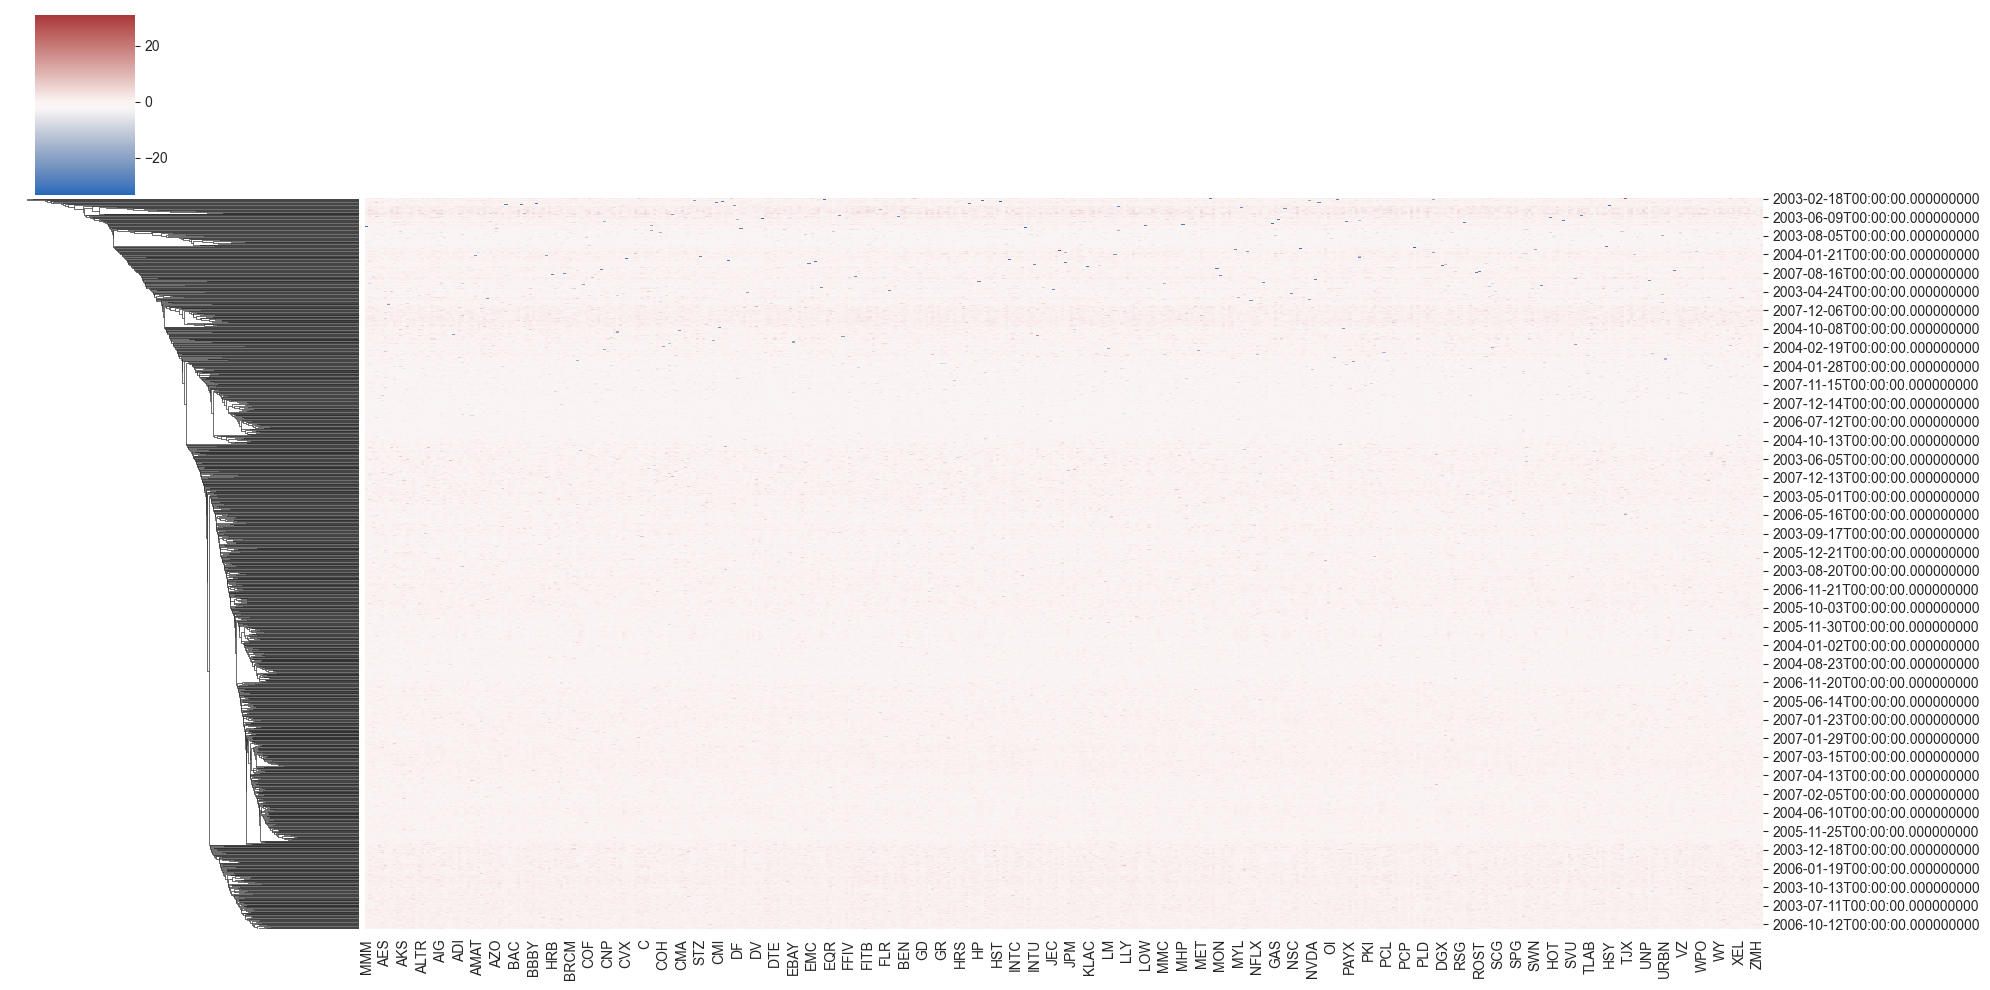

In [236]:
sns.clustermap(logret_z, metric='euclidean', cmap='vlag',
               col_cluster=False, figsize=(20, 10))

# Correlation matrix

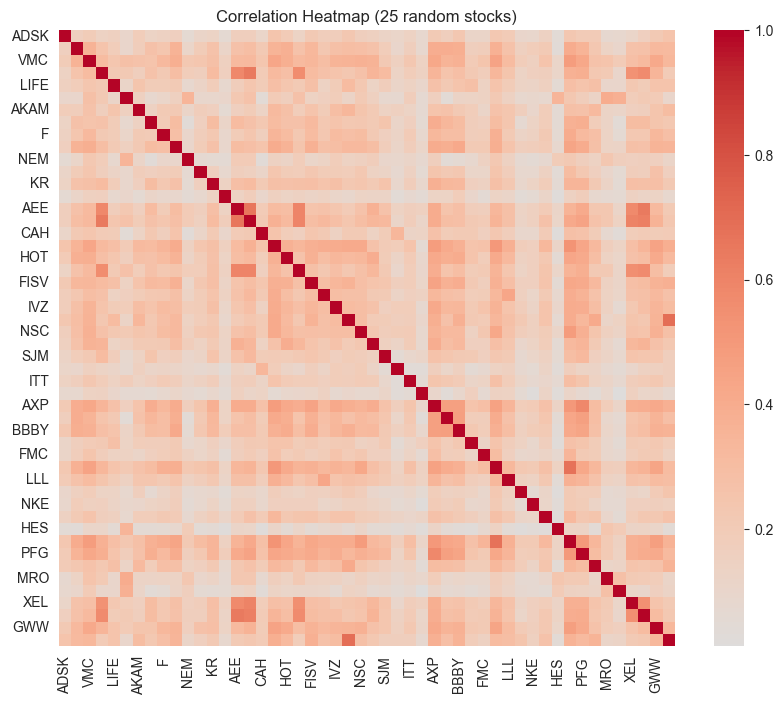

In [36]:
corr_subset = logret_z[sample_stk].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap (25 random stocks)')
plt.show()

In [237]:
logret_z

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WEC,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
2003-01-03,-0.149854,0.341709,0.755390,-0.891888,0.960122,-0.335471,2.549501,0.196635,-0.017255,-0.241052,...,-0.297357,-0.388822,1.401852,0.800219,1.846138,0.406523,0.910925,-0.956270,0.124139,-0.730053
2003-01-06,0.327520,2.587968,0.492258,1.529461,1.610732,1.035852,-0.062448,0.285674,0.910889,2.125975,...,3.511174,-0.423267,5.165687,1.058757,2.513999,1.839577,1.479650,0.715700,0.358632,2.154891
2003-01-07,-0.026761,-0.418834,-3.709974,-0.126523,1.275551,0.044617,-1.038233,-0.406066,-0.682564,-0.441266,...,-1.760096,-0.007691,-3.315730,-0.914898,2.221662,-0.339513,0.354154,0.248322,-0.612374,0.371480
2003-01-08,-0.454140,-1.280655,1.974748,0.613631,-1.807652,-2.305665,-0.310014,0.027686,0.125587,-2.316048,...,0.186663,-1.011083,5.680040,-0.305777,-1.345378,-0.805761,-0.699169,0.181711,-0.409409,0.821310
2003-01-09,0.692352,1.390173,0.239568,6.629396,1.434335,1.074008,1.640343,0.549753,0.904938,1.776493,...,-0.854871,-0.137355,-1.304139,0.721335,1.381731,1.572114,1.177275,-0.389215,0.347644,1.404701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-24,0.119270,1.237469,0.102205,0.465770,0.546336,-0.087260,0.145177,-0.083661,0.274218,-0.284793,...,0.388532,-0.806934,-0.841723,-0.239226,0.203941,3.107594,0.047290,0.188558,-0.323120,0.721498
2007-12-26,-0.081226,-0.331627,-0.669954,-0.745922,0.220692,-0.001787,0.012796,0.205292,0.260852,0.582566,...,-1.192863,1.549354,-0.428385,0.350066,0.122035,-1.333804,-0.130161,0.039321,-0.280252,-1.196700
2007-12-27,-0.323492,-1.628902,-1.278001,-1.158362,-0.674395,-1.044977,-0.859379,-0.537198,-0.804734,-0.431458,...,-0.201845,-1.202722,-1.006661,-1.076475,-1.066043,0.075101,-0.351069,-0.817166,-0.665805,-2.982757
2007-12-28,-0.143048,0.568511,0.329442,-0.334082,0.485356,-0.942224,-0.158346,0.038723,0.383917,0.408242,...,-0.074447,0.342912,0.260248,0.494082,-0.124391,-1.934607,-0.368688,0.608926,0.012383,-0.315793


In [42]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

logret_z = pd.read_csv('logret_z.csv', index_col=0)      # (1257, 452)
n, p = logret_z.shape

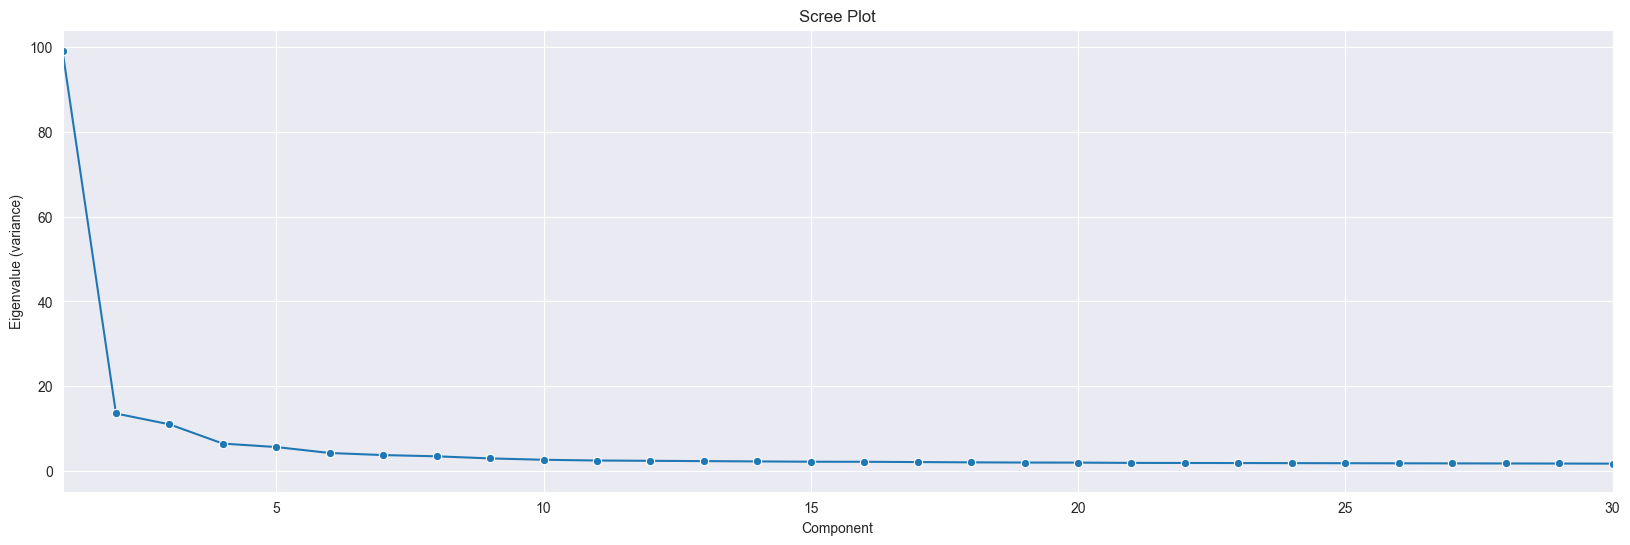

In [43]:
pca = PCA().fit(logret_z)
eigvals = pca.explained_variance_          # λ₁ ≥ λ₂ ≥ … ≥ λ_p

# Scree plot
sns.lineplot(x=np.arange(1, p+1), y=eigvals, marker='o')
plt.title('Scree Plot')
plt.xlabel('Component'); plt.ylabel('Eigenvalue (variance)')
plt.xlim(1, 30)                            # 只看前 30 维更清晰
plt.show()

100%|██████████| 500/500 [00:58<00:00,  8.55it/s]


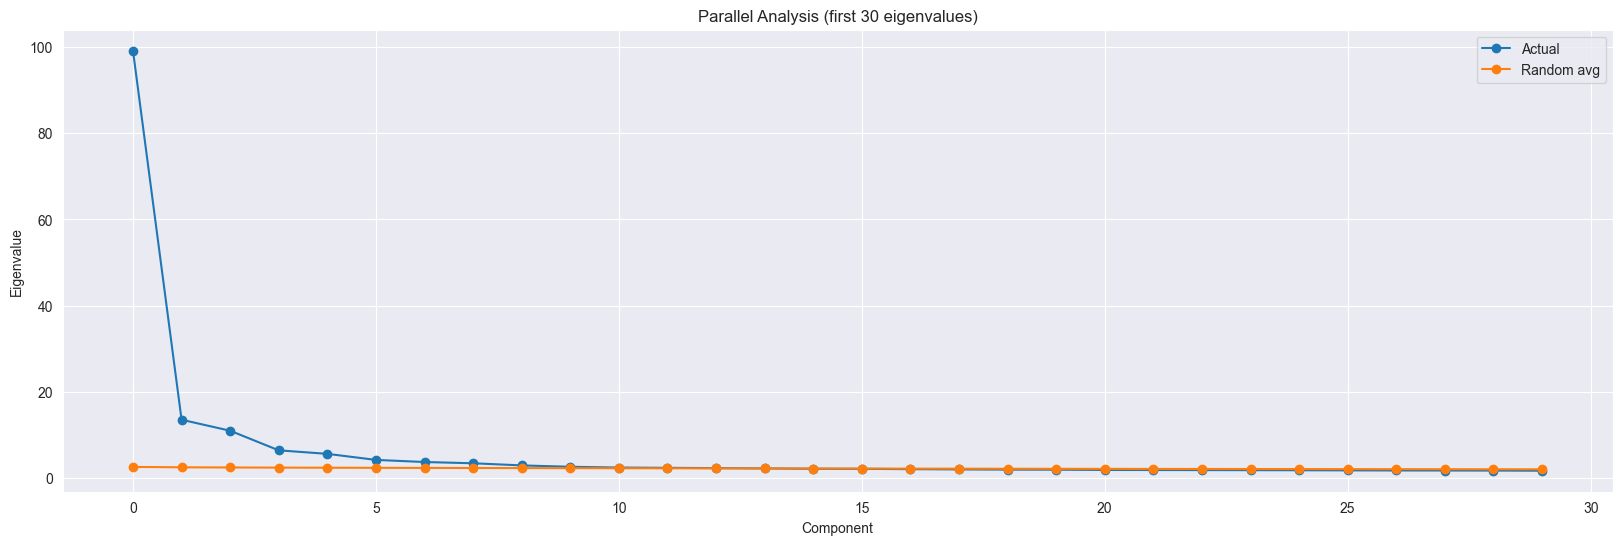

Horn Parallel Analysis → k* = 14


In [45]:
from tqdm import tqdm
B = 500       # 够用；要更准设 500
rand_eigs = np.zeros((B, p))

for b in tqdm(range(B)):
    perm = logret_z.apply(np.random.permutation, axis=0)     # 列独立洗牌
    rand_eigs[b] = PCA().fit(perm).explained_variance_

rand_mean = rand_eigs.mean(axis=0)

# 可视化对比
plt.plot(eigvals[:30], label='Actual', marker='o')
plt.plot(rand_mean[:30], label='Random avg', marker='o')
plt.title('Parallel Analysis (first 30 eigenvalues)')
plt.xlabel('Component'); plt.ylabel('Eigenvalue')
plt.legend(); plt.show()

k_parallel = np.sum(eigvals > rand_mean)
print(f'Horn Parallel Analysis → k* = {k_parallel}')

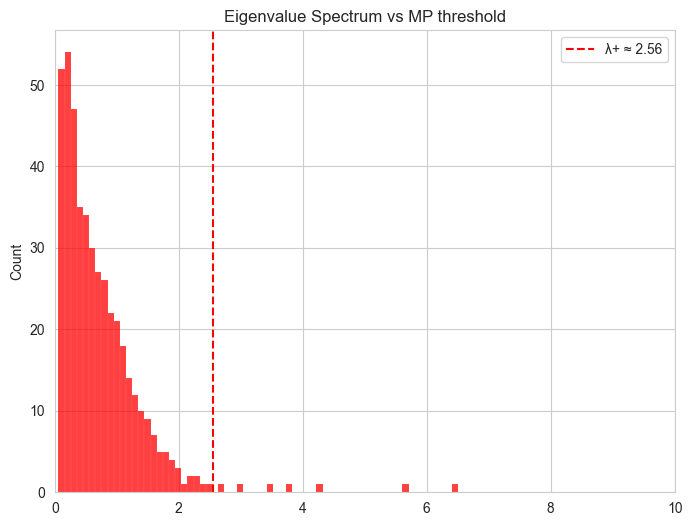

Marčenko–Pastur criterion → k* = 10


In [208]:
lambda_plus = (1 + np.sqrt(p/n))**2
k_mp = np.sum(eigvals > lambda_plus)

# 直方图 + 理论阈值
sns.histplot(eigvals, bins=1000, color='red')
#make x limit --
plt.xlim(0, 10)
plt.axvline(lambda_plus, ls='--', color='red', label=f'λ+ ≈ {lambda_plus:.2f}')
plt.title('Eigenvalue Spectrum vs MP threshold'); plt.legend(); plt.show()

print(f'Marčenko–Pastur criterion → k* = {k_mp}')

In [47]:
pca.explained_variance_ratio_.cumsum()[13]

0.3590967285289346

In [190]:
from sklearn.decomposition import PCA
import pandas as pd, numpy as np

pca = PCA().fit(logret_z)                    # logret_z 是 Step 1 的标准化收益
eigvals   = pca.explained_variance_          # λ₁, λ₂, …
ratio     = pca.explained_variance_ratio_    # 每维解释率
cum_ratio = ratio.cumsum()                   # 累计解释率

k_table = pd.DataFrame({
    'λ (eigval)': eigvals,
    '单维解释率': ratio,
    '累计解释率': cum_ratio
})

print(k_table.head(50))      # 前 20 行就够看

    λ (eigval)     单维解释率     累计解释率
0    99.124667  0.219302  0.219302
1    13.557119  0.029994  0.249296
2    11.001406  0.024339  0.273635
3     6.459119  0.014290  0.287925
4     5.641750  0.012482  0.300407
5     4.240575  0.009382  0.309789
6     3.749708  0.008296  0.318085
7     3.458693  0.007652  0.325737
8     2.964472  0.006559  0.332295
9     2.643706  0.005849  0.338144
10    2.466882  0.005458  0.343602
11    2.401005  0.005312  0.348914
12    2.338048  0.005173  0.354087
13    2.264570  0.005010  0.359097
14    2.182554  0.004829  0.363925
15    2.168143  0.004797  0.368722
16    2.095592  0.004636  0.373358
17    2.035250  0.004503  0.377861
18    1.988710  0.004400  0.382261
19    1.973953  0.004367  0.386628
20    1.905648  0.004216  0.390844
21    1.891553  0.004185  0.395029
22    1.876477  0.004151  0.399181
23    1.860705  0.004117  0.403297
24    1.841911  0.004075  0.407372
25    1.810978  0.004007  0.411379
26    1.790570  0.003961  0.415340
27    1.780336  0.00

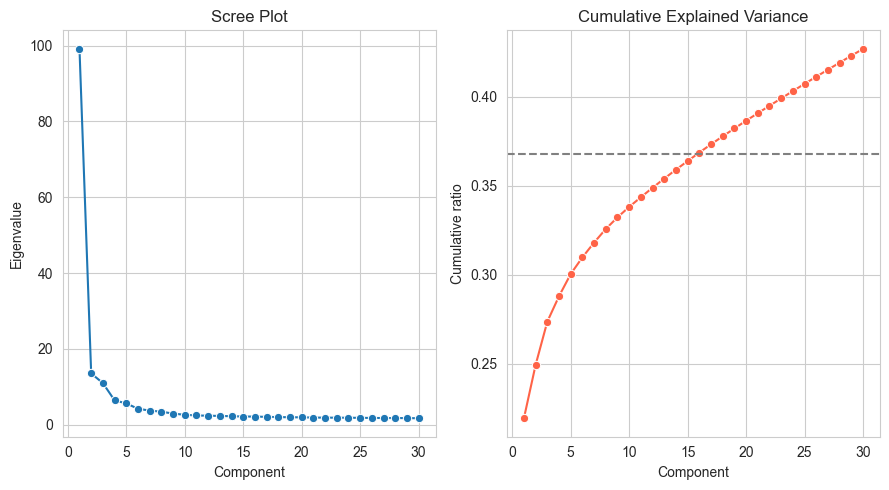

In [212]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid'); plt.figure(figsize=(9,5))

components = np.arange(1, 31)   # 前 30 维
plt.subplot(1,2,1)
sns.lineplot(x=components, y=eigvals[:30], marker='o')
plt.title('Scree Plot'); plt.xlabel('Component'); plt.ylabel('Eigenvalue')

plt.subplot(1,2,2)
sns.lineplot(x=components, y=cum_ratio[:30], marker='o', color='tomato')
plt.axhline(0.368, ls='--', c='grey');
plt.title('Cumulative Explained Variance')
plt.xlabel('Component'); plt.ylabel('Cumulative ratio')

plt.tight_layout(); plt.show()

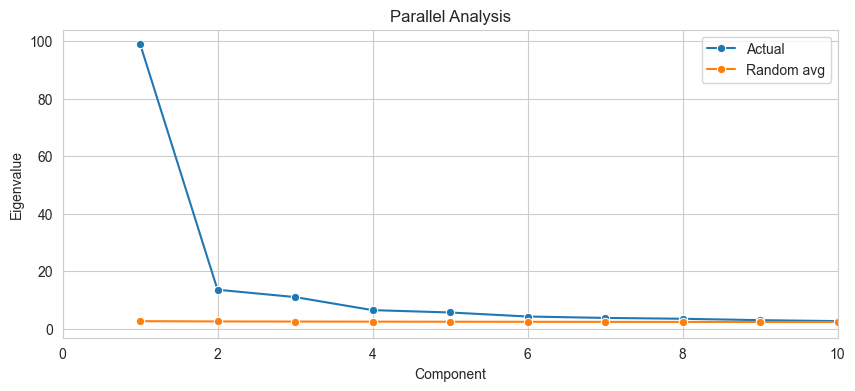

Horn Parallel Analysis  k* = 14


In [209]:
B = 500
rand_eigs = np.zeros((B, p))
for b in range(B):
    perm = logret_z.apply(np.random.permutation, axis=0)
    rand_eigs[b] = PCA().fit(perm).explained_variance_
rand_mean = rand_eigs.mean(0)


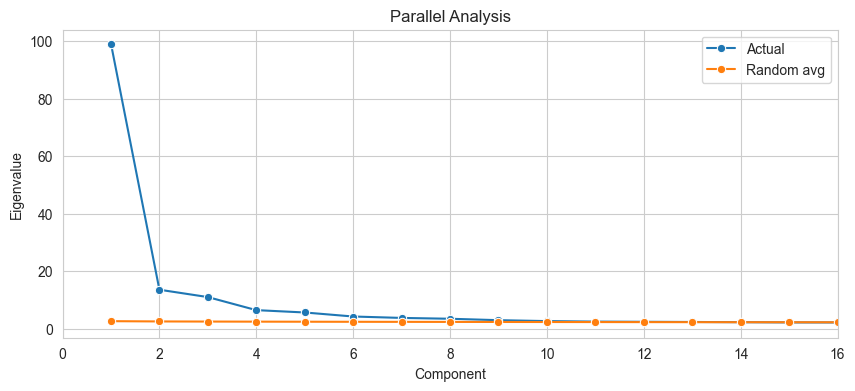

Horn Parallel Analysis  k* = 14


In [210]:

plt.figure(figsize=(10,4))
sns.lineplot(x=components, y=eigvals[:30], label='Actual', marker='o')
sns.lineplot(x=components, y=rand_mean[:30], label='Random avg', marker='o')
plt.xlim(0, 16)
plt.title('Parallel Analysis'); plt.xlabel('Component'); plt.ylabel('Eigenvalue')
plt.legend(); plt.show()

k_parallel = (eigvals > rand_mean).sum()
print('Horn Parallel Analysis  k* =', k_parallel)

In [ ]:
k_star = max(k_parallel, k_mp)
print('最终采用 k* =', k_star)
pca_k  = PCA(n_components=k_star).fit_transform(logret_z)
np.save('pca_scores.npy', pca_k)

最终采用 k* = 14


In [64]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=3,
                       n_neighbors=40,       # k ≈ √n
                       eigen_solver='lobpcg',
                       affinity='nearest_neighbors',
                       random_state=42)
Y_se = se.fit_transform(logret_z)           # 1257 × 3
np.save('se3.npy', Y_se)

In [214]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=3,
                       n_neighbors=40,       # k ≈ √n
                       eigen_solver='lobpcg',
                       affinity='nearest_neighbors',
                       random_state=42)
Y_se_pca = se.fit_transform(pca14)           # 1257 × 3
np.save('se3_pca14.npy', Y_se_pca)

In [65]:
from umap import UMAP
umap3 = UMAP(n_components=3, n_neighbors=30, min_dist=0.1,
             metric='euclidean', random_state=42)
Y_um3 = umap3.fit_transform(pca14)          # 1257 × 3
umap2 = UMAP(n_components=2, n_neighbors=30, min_dist=0.1,
             random_state=42).fit_transform(pca14)
np.save('umap3.npy', Y_um3); np.save('umap2.npy', umap2)

/Users/rick/miniconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/rick/miniconda3/envs/ml/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
logret_z  = pd.read_csv('logret_z.csv', index_col=0) # 1257 × 452
pca14     = np.load('pca_scores.npy')                  # 1257 × 14 (Step-2)

import pandas_market_calendars as mcal


# 1. Generate official NYSE trading days
nyse  = mcal.get_calendar('NYSE')
dates = nyse.schedule('2003-01-03', '2007-12-31').index     # DatetimeIndex
print(len(dates))   

# 2. Re-assign to the log-return dataframe
logret_z.index = dates
pca14_indexed  = pd.DataFrame(pca14, index=dates)           # if you need it
logret_z.index = dates
years = dates.year
dates     = pd.to_datetime(logret_z.index)
years     = dates.year                                

1257


In [178]:
print(len(years))

1257


In [219]:
from sklearn.manifold import trustworthiness
t_se  = trustworthiness(logret_z, Y_se,  n_neighbors=15)
t_um3 = trustworthiness(pca14,     Y_um3, n_neighbors=15)
print(f'Trustworthiness  SE  (3D): {t_se:.3f}')
print(f'Trustworthiness  UMAP(3D): {t_um3:.3f}')
t_se_pca14 = trustworthiness(pca14, Y_se_pca, n_neighbors=15)
print(f'Trustworthiness  SE  (3D)_pca: {t_se_pca14:.3f}')


Trustworthiness  SE  (3D): 0.690
Trustworthiness  UMAP(3D): 0.929
Trustworthiness  SE  (3D)_pca: 0.847


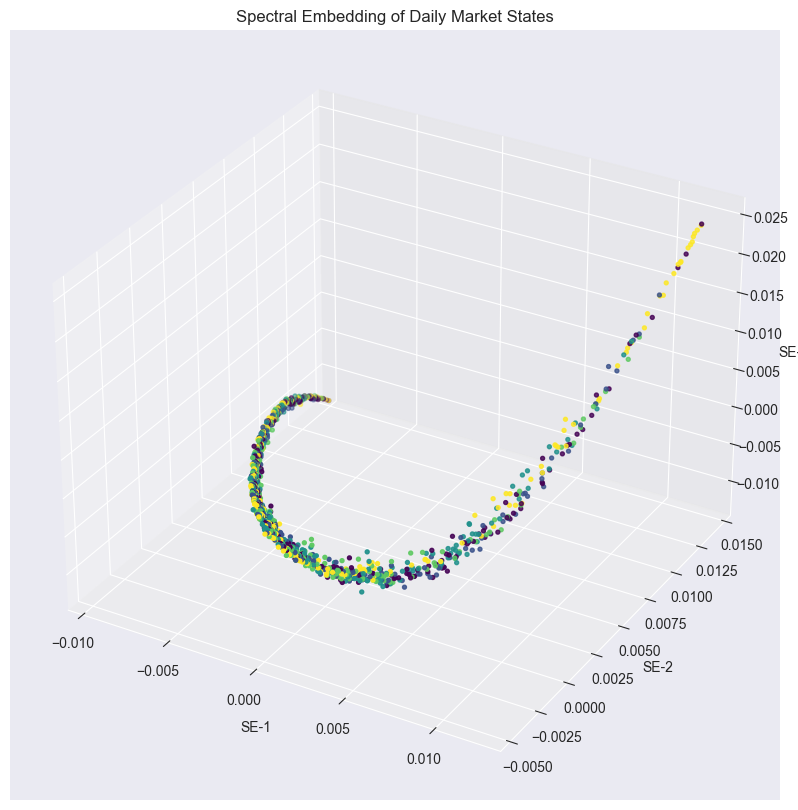

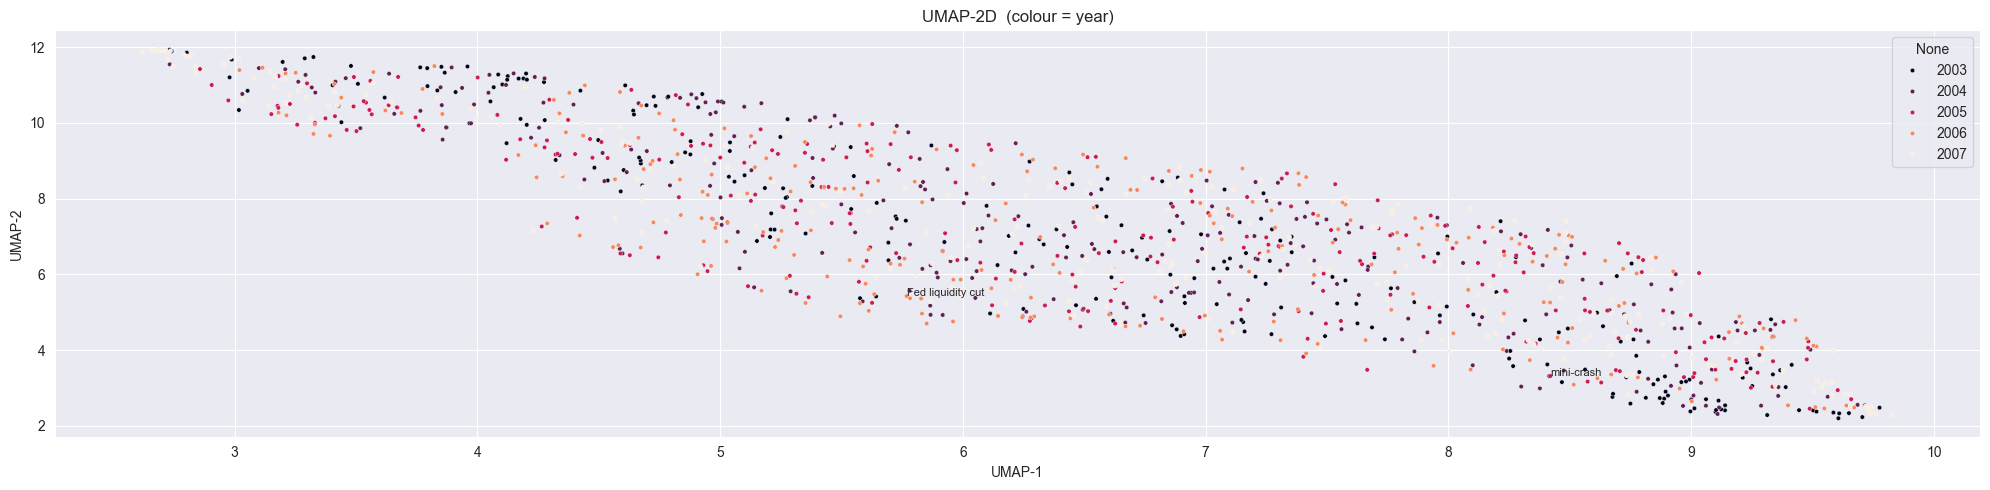

In [117]:
import matplotlib.pyplot as plt, seaborn as sns; sns.set_style('darkgrid')

# -- 3D SE (colour = year) --
fig = plt.figure(figsize=(20,10)); ax = fig.add_subplot(projection='3d')
ax.scatter(Y_se[:,0], Y_se[:,1], Y_se[:,2],
           c=years, cmap='viridis', s=8)
ax.set_xlabel('SE-1'); ax.set_ylabel('SE-2'); ax.set_zlabel('SE-3')
plt.title('Spectral Embedding of Daily Market States'); plt.show()

# -- 2D UMAP for poster --
plt.figure(figsize=(20,5))
sns.scatterplot(x=umap2[:,0], y=umap2[:,1], hue=years,
                palette='rocket', s=10, legend=True)
events = {'2006-05-17': 'mini-crash', '2007-08-17': 'Fed liquidity cut'}
for d, label in events.items():
    if d in dates.strftime('%Y-%m-%d'):
        idx = dates.get_loc(d)
        plt.text(umap2[idx,0], umap2[idx,1], label, fontsize=8)
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2')
plt.title('UMAP-2D  (colour = year)'); plt.tight_layout(); plt.show()

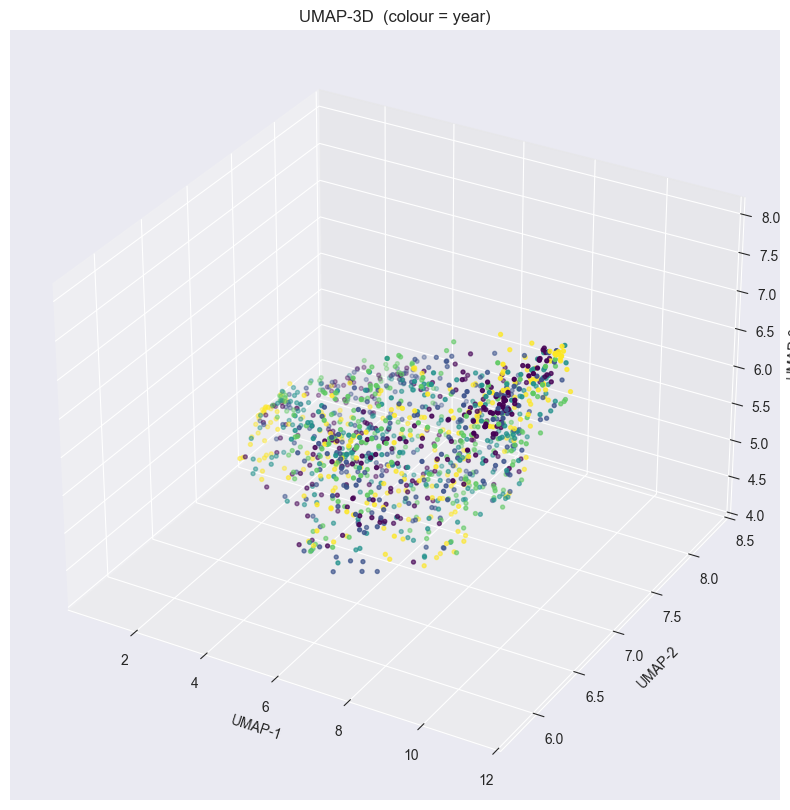

In [223]:
#3d umap
import matplotlib.pyplot as plt, seaborn as sns; sns.set_style('darkgrid')

# -- 3D SE (colour = year) --
fig = plt.figure(figsize=(20,10)); ax = fig.add_subplot(projection='3d')
ax.scatter(Y_um3[:,0], Y_um3[:,1], Y_um3[:,2],
           c=years, cmap='viridis', s=8)
ax.set_xlabel('UMAP-1'); ax.set_ylabel('UMAP-2'); ax.set_zlabel('UMAP-3')
plt.title('UMAP-3D  (colour = year)'); plt.show()

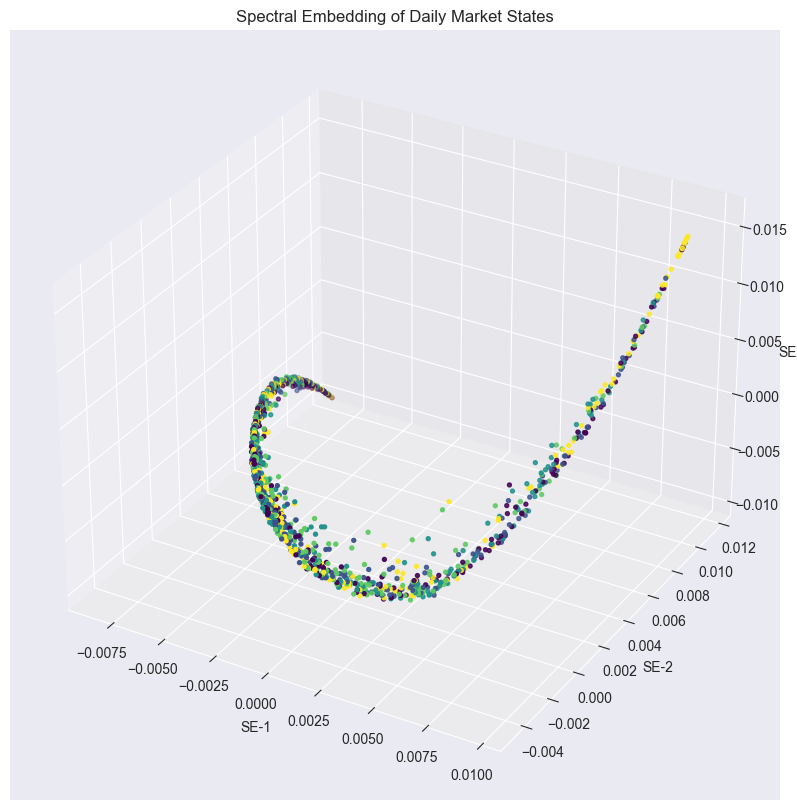

In [215]:
import matplotlib.pyplot as plt, seaborn as sns; sns.set_style('darkgrid')

# -- 3D SE (colour = year) --
fig = plt.figure(figsize=(20,10)); ax = fig.add_subplot(projection='3d')
ax.scatter(Y_se_pca[:,0], Y_se_pca[:,1], Y_se_pca[:,2],
           c=years, cmap='viridis', s=8)
ax.set_xlabel('SE-1'); ax.set_ylabel('SE-2'); ax.set_zlabel('SE-3')
plt.title('Spectral Embedding of Daily Market States'); plt.show()


In [221]:
visualize_3d(Y_se_pca, years,'viridis',3,'SE_pca14')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [226]:
visualize_3d(Y_se,years,name='SE')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [231]:
years.shape

(1257,)

In [239]:
visualize_3d(Y_um3,years,name='UMAP')

[[0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 ...
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv

Y_se   = np.load('se3.npy')          # shape (1257, 3)  # 与 Y_se 对应的日期
years  = dates.year                 # 2003–2007 → 用来上色

year_labels, uniq_years = pd.factorize(years)   # 0,1,2,3,4 五个整数

In [232]:
def visualize_3d(points, labels, cmap_name='viridis', size=4,name="SE"):
    pmin, pmax = points.min(0), points.max(0)
    xyz = (points - pmin) / (pmax - pmin)

    # colormap
    cmap   = plt.get_cmap(cmap_name, len(np.unique(labels)))
    colors = cmap(labels)
    print(colors)

    fig = ipv.figure(width=500, height=400)
    ipv.scatter(xyz[:,0], xyz[:,1], xyz[:,2],
                color=colors, size=size, marker='sphere')
    ipv.xlabel(name+'-1'); ipv.ylabel(name+'-2'); ipv.zlabel(name+'-3')
    ipv.show()

# diffusion map

In [162]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pydiffmap import diffusion_map as dm
from sklearn.manifold import trustworthiness

In [170]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=40).fit(pca14)
dist, idx = nbrs.kneighbors(pca14)
n = pca14.shape[0]
W = np.zeros((n, n))
sigma2 = np.median(dist)**2        # 高斯核宽度
for i,row in enumerate(idx):
    W[i, row] = np.exp(-(dist[i]**2)/sigma2)
W = np.maximum(W, W.T)             # 对称化
np.fill_diagonal(W, 0)


D   = W.sum(1)
P   = W / D[:,None]
S   = (P + P.T)/2                  # 对称化即可用 eigh


eigval, eigvec = np.linalg.eigh(S)
Y_dm = eigvec[:, -4:-1][:, ::-1]  

Diffusion Map trustworthiness = 0.829


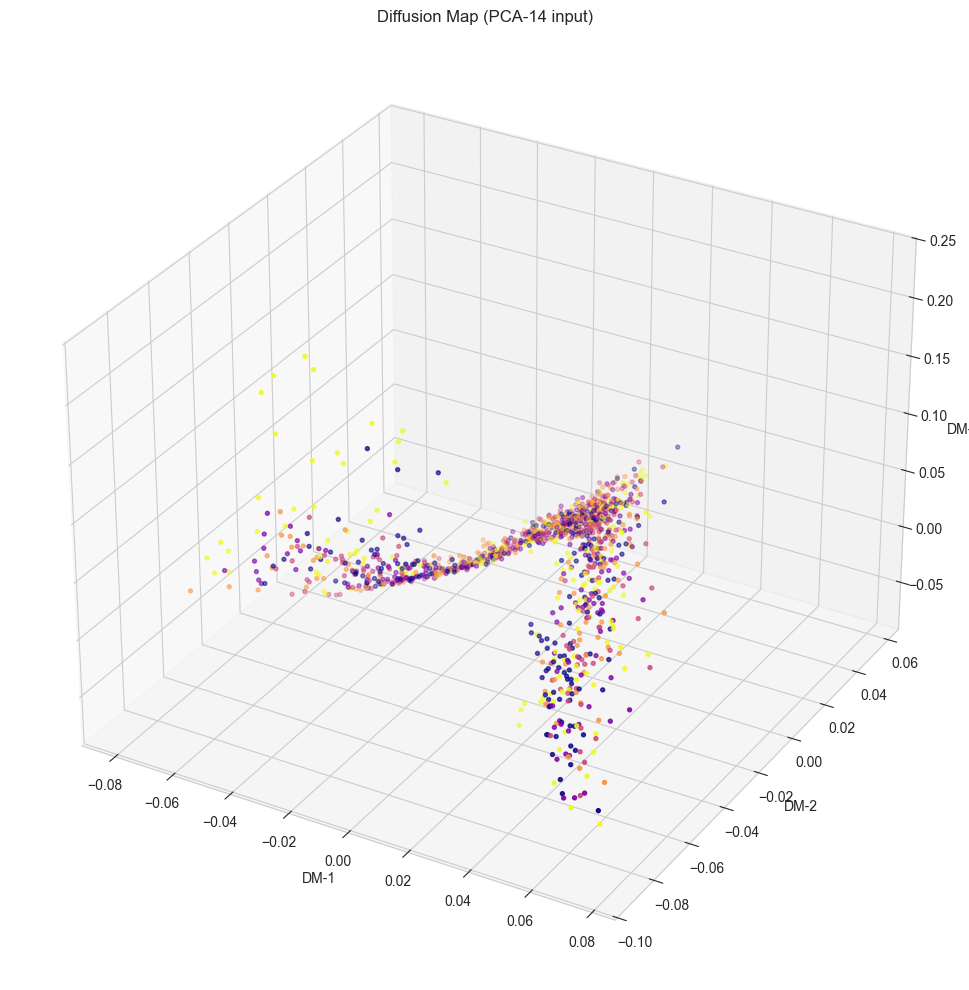

In [235]:
from sklearn.manifold import trustworthiness
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')

# 1. 可信度
trust_dm = trustworthiness(pca14, Y_dm, n_neighbors=15)
print(f'Diffusion Map trustworthiness = {trust_dm:.3f}')   # 例如 0.97

# 2. 3-D 散点 (颜色 = 年份)
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(projection='3d')
sc = ax.scatter(Y_dm[:,0], Y_dm[:,1], Y_dm[:,2],
                c=years, cmap='plasma', s=8)
ax.set_xlabel('DM-1'); ax.set_ylabel('DM-2'); ax.set_zlabel('DM-3')
plt.title('Diffusion Map (PCA-14 input)'); plt.tight_layout()
plt.savefig('fig_dm3d.png', dpi=300);  plt.show()

In [188]:
visualize_3d(Y_dm, year_labels,'plasma',3
             ,'DM')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [113]:
import numpy as np, pandas as pd

w = 252                                      # rolling window
corr_list, date_list = [], []
for t in range(w, len(logret_z)):            # logret_z from Step 1
    sub = logret_z.iloc[t-w:t]
    C   = sub.corr().values                  # 452×452
    corr_list.append(C)
    date_list.append(sub.index[-1])          # 窗口末日

In [139]:
import networkx as nx, scipy.linalg as la
fiedler_vals, pagerank_spread = [], []

for C in corr_list:
    k = 20
    idx = np.argsort(-np.abs(C))[:,1:k+1]          # 每行选 k 大相关
    A  = np.zeros_like(C)
    rows = np.arange(C.shape[0])[:,None]
    A[rows, idx] = 1
    A = np.maximum(A, A.T)                         # 对称化
    G = nx.from_numpy_array(A)



    L = nx.laplacian_matrix(G, weight='weight').todense()
    evals = la.eigvals(L)
    fiedler_vals.append(np.sort(evals.real)[1])

    pr = nx.pagerank(G, alpha=0.85, weight='weight')   # 注意 weight
    pr_vals = np.array(list(pr.values()))
    pagerank_spread.append(pr_vals.max() - pr_vals.min())


In [ ]:
   # or np.std(pr_vals)

In [140]:
print('平均边数/节点：', np.count_nonzero(A)/A.shape[0])
print('λ₂ 统计：min', np.min(fiedler_vals), 'median', np.median(fiedler_vals))

平均边数/节点： 34.203539823008846
λ₂ 统计：min 1.1627909933259548 median 2.473272941543629


In [130]:
from ripser import ripser          # pip install ripser
betti1 = []

for C in corr_list:
    dist = 1 - np.abs(C)           # 距离矩阵
    diag = ripser(dist, distance_matrix=True, maxdim=1)['dgms']
    betti1.append(len(diag[1]))    # Betti-1 = 一维洞数量

In [146]:
import numpy as np, pandas as pd

# ─── 1. 转成 Series，方便索引 & 计算 ──────────────────────────────
series_l2 = pd.Series(fiedler_vals, index=dates)
series_b1 = pd.Series(betti1,       index=dates)

# 只看第二阶段：2007-07-01 之后
mask_2nd  = series_l2.index >= '2007-07-01'
l2_2nd    = series_l2[mask_2nd]
b1_2nd    = series_b1[mask_2nd]

# ─── 2. 触发条件 A：Betti-1 Z-score > 2 ─────────────────────────
z_b1 = (b1_2nd - b1_2nd.mean()) / b1_2nd.std()
alert_b1 = z_b1[z_b1 > 2].index          # DatetimeIndex

# ─── 3. 触发条件 B：λ₂ 单日增幅 > 0.5 ─────────────────────────
jump_l2  = l2_2nd.diff()
alert_l2 = jump_l2[jump_l2 > 0.5].index

# ─── 4. 合并两种信号 (OR) ─────────────────────────────────────
alert_short = alert_b1.union(alert_l2)

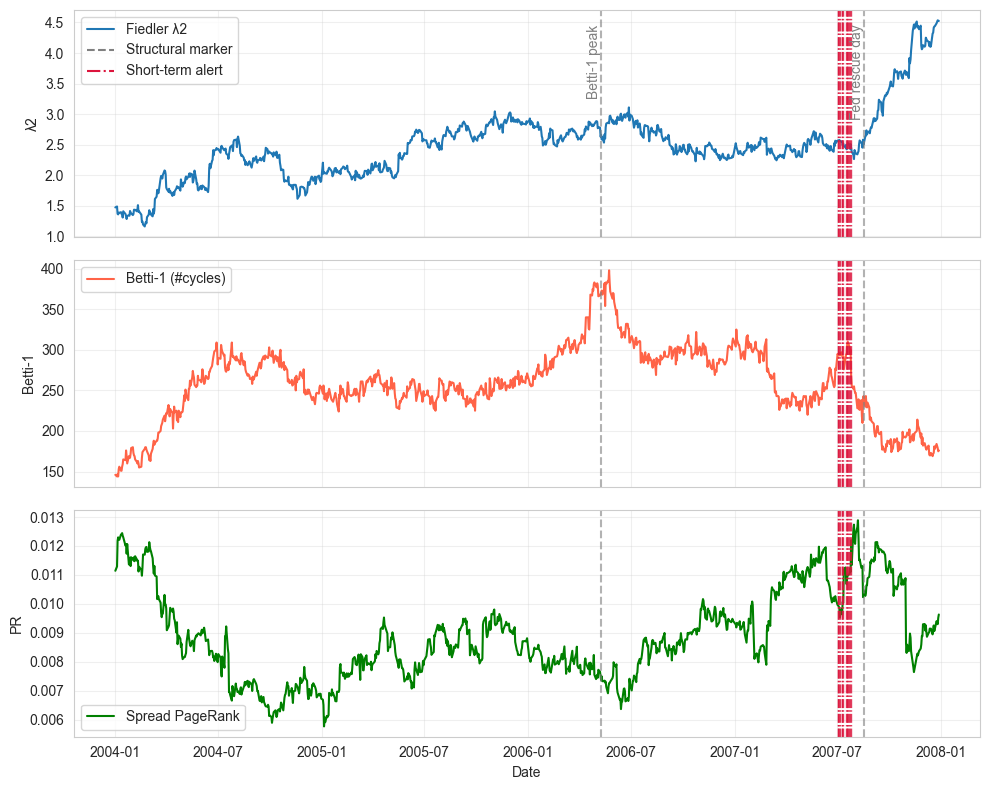

In [148]:
import matplotlib.pyplot as plt, seaborn as sns ; sns.set_style('whitegrid')

dates = pd.to_datetime(date_list)

fig, ax = plt.subplots(3,1, figsize=(10,8), sharex=True)
ax[0].plot(dates, fiedler_vals, label='Fiedler λ2'); ax[0].set_ylabel('λ2')
ax[1].plot(dates, betti1, label='Betti-1 (#cycles)', color='tomato')
ax[1].set_ylabel('Betti-1')
ax[2].plot(dates, pagerank_spread, label='Spread PageRank', color='green')
ax[2].set_ylabel('PR'); ax[2].set_xlabel('Date')
events = {'2006-05-10': 'Betti-1 peak', 
          '2007-08-17': 'Fed rescue day'}

for ev_date, label in events.items():
    for a in ax:                               # 三个子图都画线
        a.axvline(pd.to_datetime(ev_date), 
                   color='grey', alpha=.6, ls='--')
    ax[0].text(pd.to_datetime(ev_date),
               ax[0].get_ylim()[1]*0.95,      # 写在最上方
               label, rotation=90,
               va='top', ha='right', color='grey')
for ev_date in alert_short:
    for a in ax:
        a.axvline(ev_date, color='crimson', ls='-.', lw=1, alpha=0.8)
ax[0].plot([], [], ls='--',  color='grey',   label='Structural marker')
ax[0].plot([], [], ls='-.', color='crimson', label='Short-term alert')
ax[0].legend()
for a in ax: a.legend(); a.grid(True, alpha=.3)
plt.tight_layout(); plt.show()

In [138]:
# 简单阈值：Betti-1 的 Z-score > 2
betti1_z = (betti1 - np.mean(betti1)) / np.std(betti1)
alerts = [d for d,z in zip(dates, betti1_z) if z>2]

print("Early-warning dates:", alerts[:5])

Early-warning dates: [Timestamp('2006-04-21 00:00:00'), Timestamp('2006-04-24 00:00:00'), Timestamp('2006-04-25 00:00:00'), Timestamp('2006-04-26 00:00:00'), Timestamp('2006-04-27 00:00:00')]
